# Helpful (hopefully) notes and general measurement tips

- **Spectrum Analyzer:** The spectrum analyzer tends to timeout if it hasn't been used in a while. To restart it, simply execute the qubit initialization again or use the qb._instrument.set() command to send a value and wake the instrument back up.
- 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qubit import qubit
import numpy as np
import plot_functions as pf
#from instrument_init import init_sa

2024-04-25 15:33:28,471 - qm - INFO     - Starting session: 66ae33b6-2ea4-4cea-849a-53d35f5b712f


# Initialize qubit

In [61]:
#qb = qubit('ocs1')
qb = qubit('ocs2')


Loading parameter JSON file
Removing rr_atten from pars
2024-04-25 16:49:52,909 - qm - INFO     - Performing health check
2024-04-25 16:49:52,921 - qm - INFO     - Health check passed
Loading instrument settings from experiments\test\test_instruments.json.
Initializing readout_LO (SignalCore SC5511A Signal Generator).
Initializing qubit_LO (SignalCore SC5511A Signal Generator).
Initializing DA (Vaunix Lab Brick Digital Attenuator).
Initializing sa (SignalHound SpectrumAnalyzer).
Setting readout_LO frequency to 7600000000.0.
Setting readout_LO output to True.
Setting qubit_LO frequency to 2500000000.0.
Setting qubit_LO power to 17.
Setting qubit_LO output to True.
Setting DA attenuation to 0.


# Time of flight

For tof calibration, we don't need the resontor frequency per se

In [4]:
qb.update_value('readout_atten',0)
qb.update_value('tof',56) #clock cycles
qb.update_value('smearing',10)
qb.update_value('n_avg',1000)
qb.update_value('rr_IF',5e6) 
qb.update_value('readout_length',1000)

Updating readout_atten to 0
Setting DA attenuation to 0.
Updating tof to 56
Updating smearing to 10
Updating n_avg to 1000
Updating rr_IF to 5000000.0
Updating readout_length to 1000


2024-04-25 15:33:32,273 - qm - INFO     - Performing health check
2024-04-25 15:33:32,286 - qm - INFO     - Health check passed
2024-04-25 15:33:32,469 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:33:32,523 - qm - INFO     - Executing program
Updating tof to 56
Input 1 Offset: 94.88263968673408 mV
Input 2 Offset: 65.48784155752143 mV
Updating analog_input_offsets to [-0.09488263968673408, -0.06548784155752144]


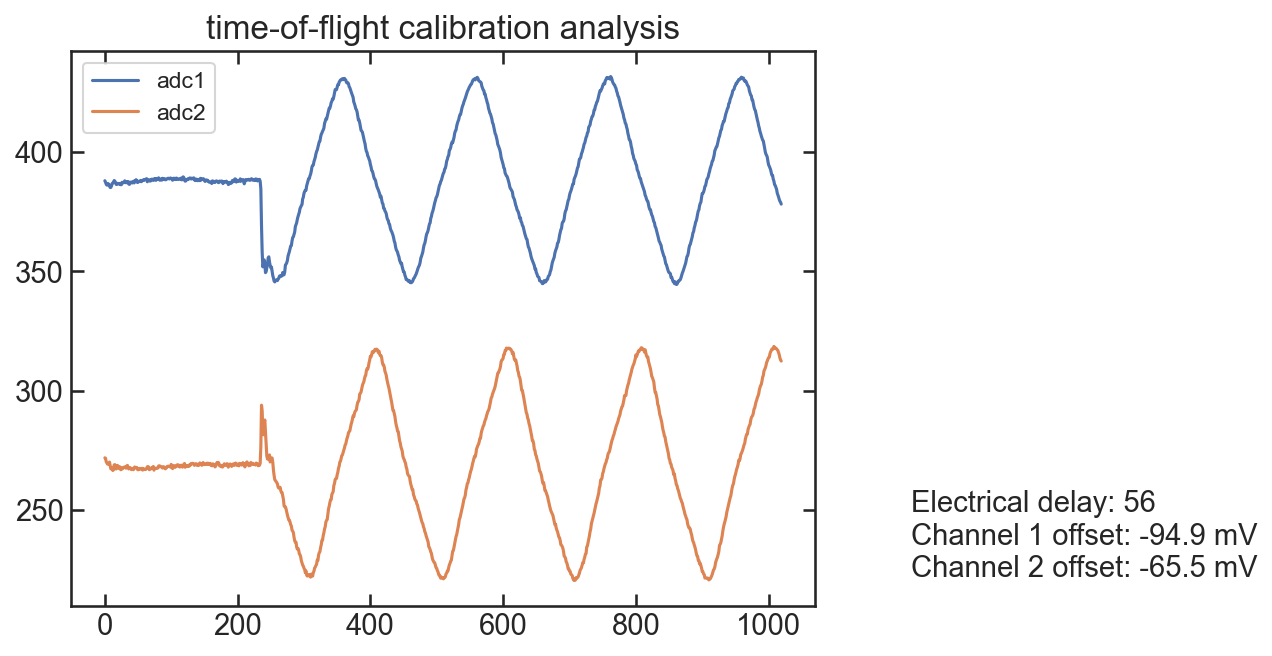

In [5]:
adc1,adc2 = qb.tof_cal(update_tof=True)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

2024-04-25 15:33:33,403 - qm - INFO     - Performing health check
2024-04-25 15:33:33,415 - qm - INFO     - Health check passed
2024-04-25 15:33:33,531 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:33:33,573 - qm - INFO     - Executing program
Updating tof to 292
Input 1 Offset: 0.021320417815563788 mV
Input 2 Offset: 0.16442847158394613 mV
Updating analog_input_offsets to [-0.09490396010454964, -0.06565227002910538]


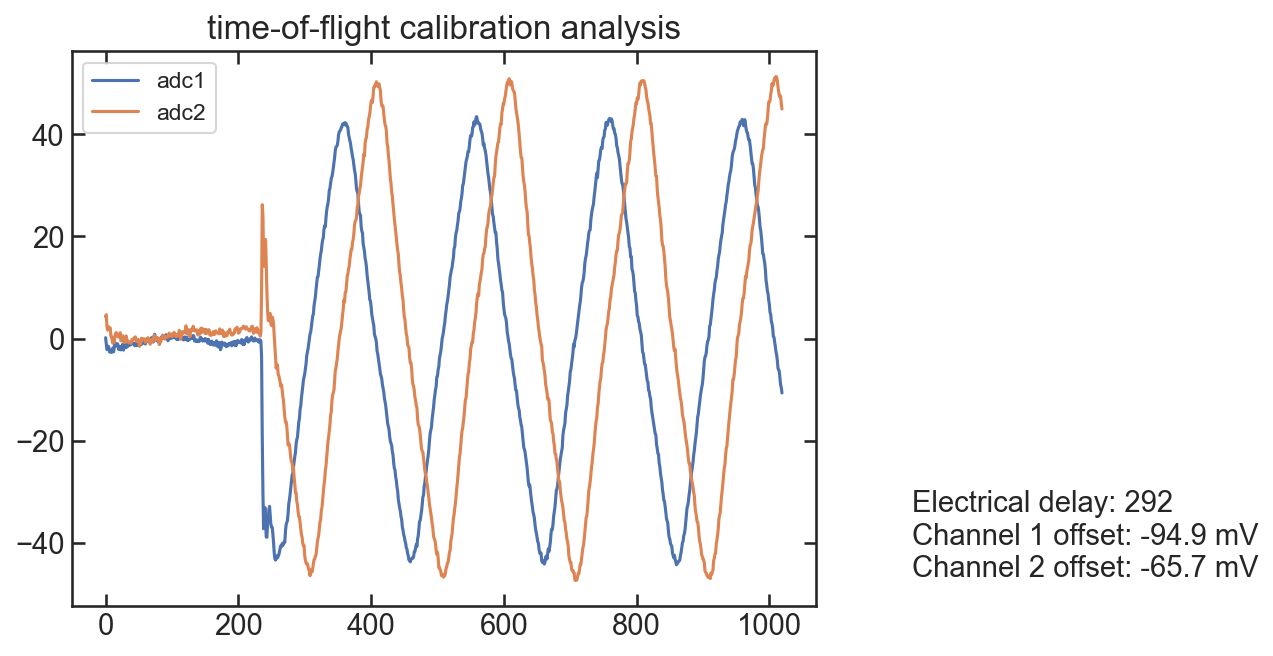

In [6]:
adc1,adc2 = qb.tof_cal(update_tof=True)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

**Note:** execute the following cell to visually see if the tof is calibrated

2024-04-25 14:53:40,977 - qm - INFO     - Performing health check
2024-04-25 14:53:40,988 - qm - INFO     - Health check passed
2024-04-25 14:53:41,107 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 14:53:41,144 - qm - INFO     - Executing program
Input 1 Offset: -2.124816655177696 mV
Input 2 Offset: 4.665438543581495 mV
Updating analog_input_offsets to [-0.0924829185336244, -0.07030003303079045]


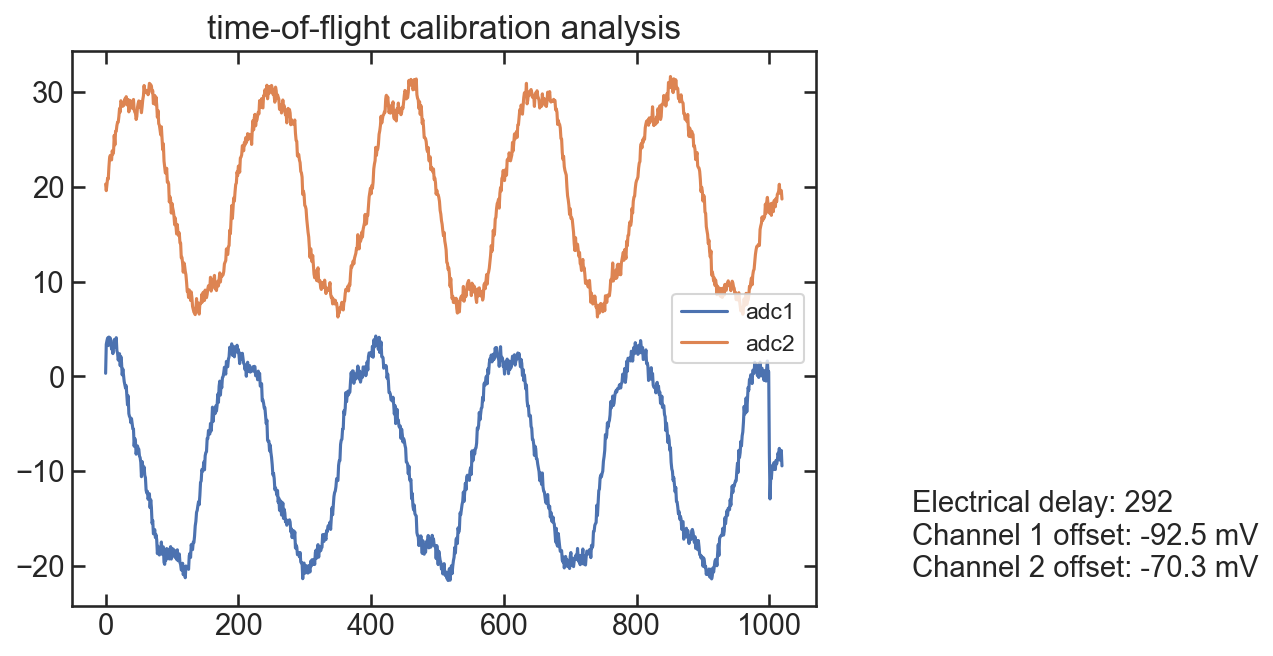

In [9]:
adc1,adc2 = qb.tof_cal(update_tof=False)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

# Optimize Mixers

Starting with the smallest resonator

In [7]:
LO_freq = 7.6e9 
rr_freq = 7.837e9
qb.update_value('rr_LO',LO_freq)
qb.update_value('rr_freq',rr_freq)
qb.update_value('rr_IF',rr_freq-LO_freq)

Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
Updating rr_freq to 7837000000.0
Updating rr_IF to 237000000.0


## Minimize LO leakage 

## Resonator

Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7600000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.
LO at 7.6 GHz
Current I_offset = 0.0 mV, Current Q_offset = 0.0 mV
Setting sa frequency to 7600000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -35.38429641723633.
Setting sa bandwidth to 1000.0.


100%|██████████| 121/121 [00:13<00:00,  9.09it/s]


Updating rr_mixer_offsets to [-0.00505, 0.0019500000000000003]
optimal I_offset = -5.0 mV, optimal Q_offset = 2.0 mV
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -72.56845092773438 dBm at 7.6 GHz


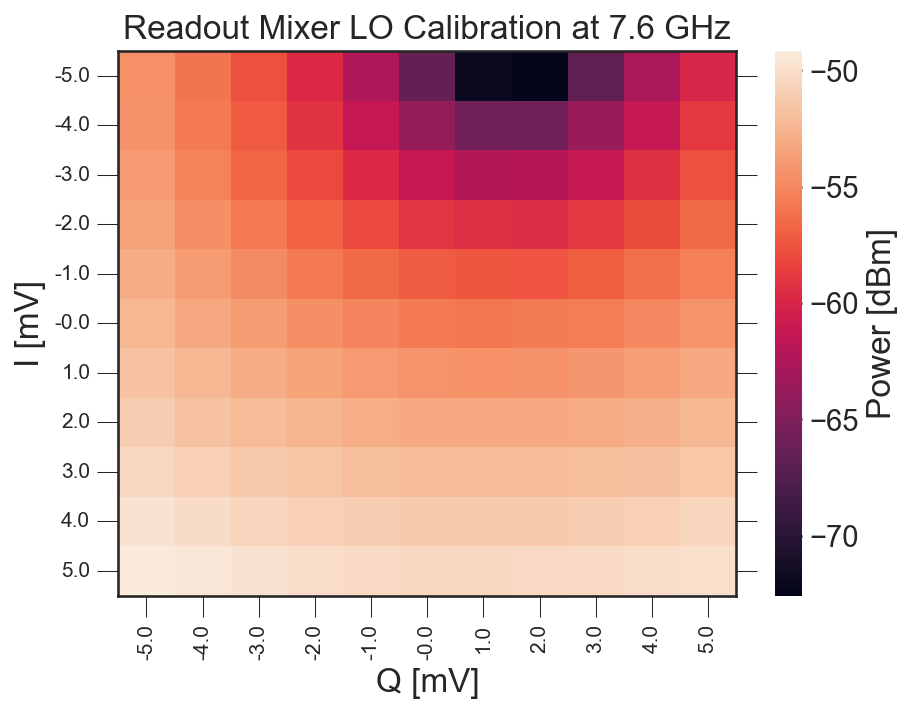

In [8]:
# qb.update_value('rr_LO',LO_freq)
#qb.update_value('rr_LO',qb.pars['rr_freq']-qb.pars['rr_IF'])
# qb.get_power(fc=qb.pars['rr_LO'],threshold=-20,span=1e6,config=True,plot=True)
qb.opt_lo_leakage(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

## Minimize image sideband

2024-04-25 15:34:04,409 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:34:04,430 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7363000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.


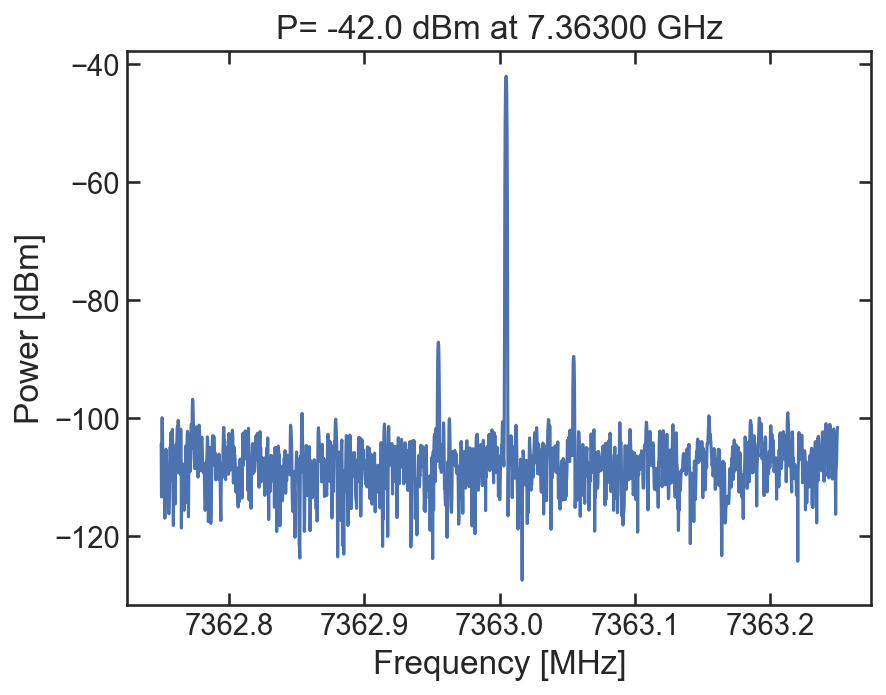

-41.99015426635742 dBm at 7.363004738450712 GHz
Sideband at 7.363 GHz
Current gain = 0, Current phase = 0


100%|██████████| 100/100 [00:10<00:00,  9.44it/s]


Updating rr_mixer_imbalance to (0.011111111111111113, -0.25)
optimal gain = 0.0111, optimal phi = -0.25
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -47.58582305908203 dBm at 7.363 GHz


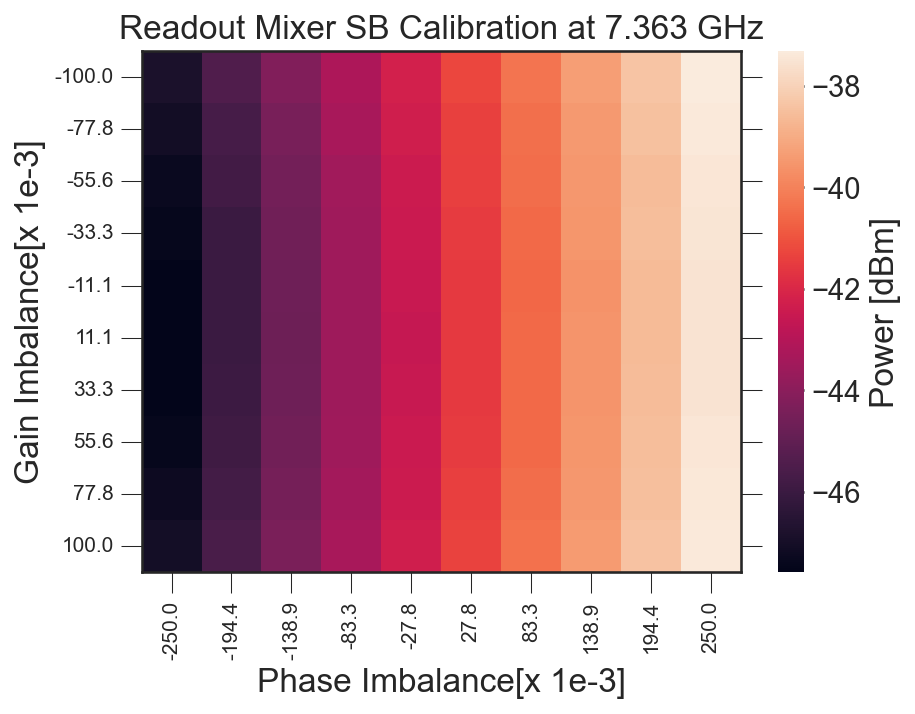

In [9]:
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

2024-04-25 15:34:21,747 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:34:21,773 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 7363000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -50.
Setting sa bandwidth to 1000.0.


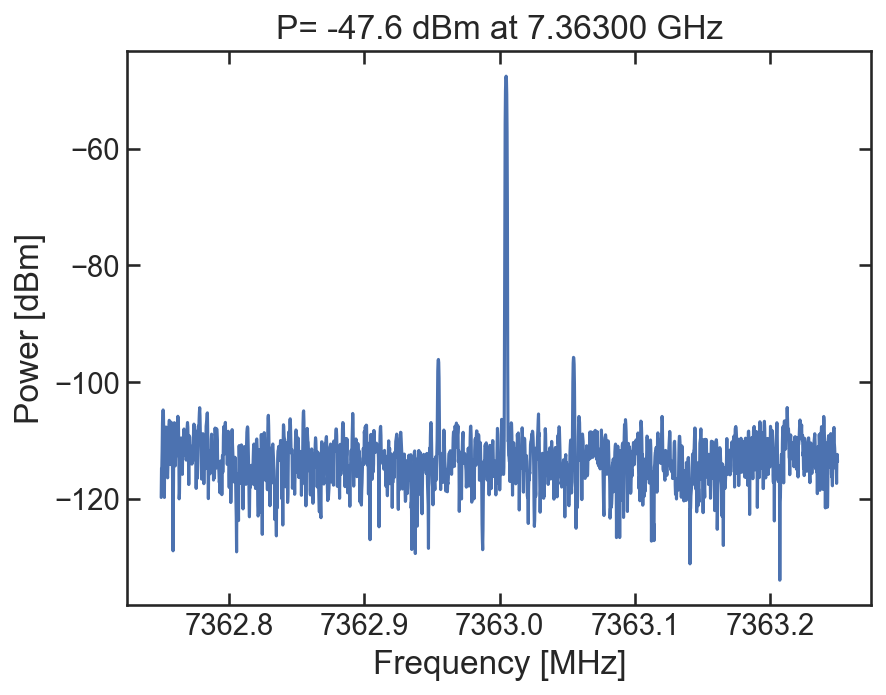

-47.583858489990234 dBm at 7.363004738450712 GHz
Sideband at 7.363 GHz
Current gain = 0.0111, Current phase = -0.25


100%|██████████| 100/100 [00:10<00:00,  9.46it/s]


Updating rr_mixer_imbalance to (0.0, -0.4444444444444444)
optimal gain = 0.0, optimal phi = -0.4444
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -69.350341796875 dBm at 7.363 GHz


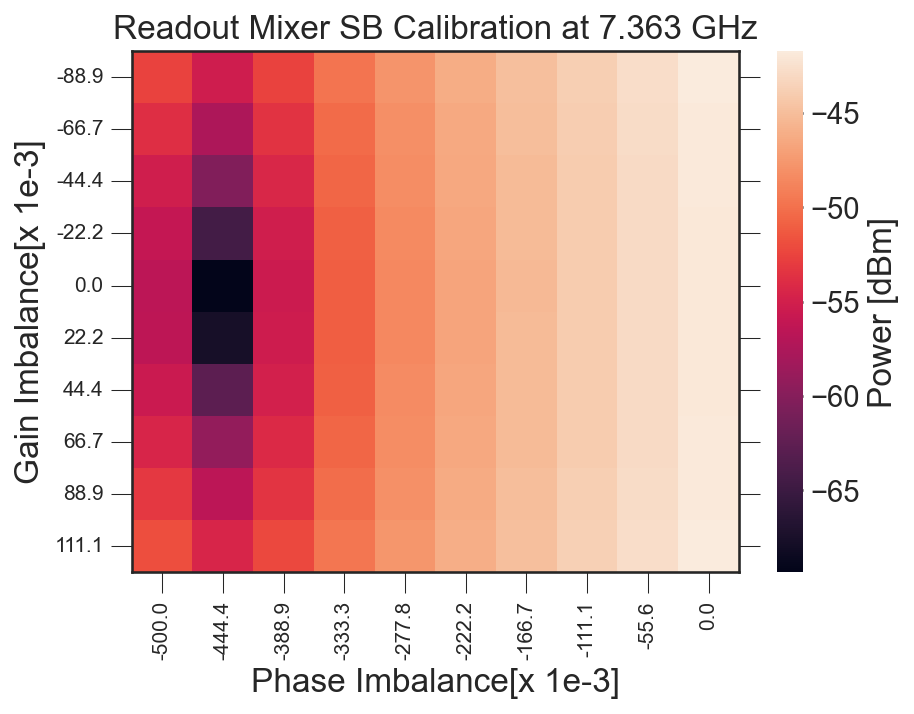

In [10]:
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.5e6,threshold=-50,plot=True)

# Resonator spectroscopy

**Notes on resonator spectroscopy**

In [11]:
IF_min, IF_max = 232e6, 241e6
df_resonator_spec = 0.025e6

In [49]:
qb.update_value('readout_length', 5000)   #ns (since resonator is narrow)
qb.pars['resettime']['rr'] = 5000 # clock cycles
qb.write_pars()
qb.update_value('n_avg',1500)
qb.update_value('readout_atten',25)
qb.experiment = 'resonator_spec'
##added a 10db fixed attenuator on rr line after the spiltter and just before fridge input
data, job = qb.resonator_spec(
                       f_LO = qb.pars['rr_LO'],
                       IF_min = IF_min,
                       IF_max = IF_max,
                       df = df_resonator_spec,
                       fit=True,
                       on_off=False,
                       savedata=True,
                       showprogress=True)

Updating readout_length to 5000
Updating n_avg to 1500
Updating readout_atten to 23
Setting DA attenuation to 23.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
2024-04-25 16:42:13,832 - qm - INFO     - Performing health check
2024-04-25 16:42:13,844 - qm - INFO     - Health check passed
2024-04-25 16:42:14,248 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 16:42:14,437 - qm - INFO     - Executing program


100%|█████████▉| 1499/1500 [00:24<00:00, 61.32it/s]


Saving data to G:\Shared drives\Quasiparticles\OCS_QP\data\ocs2\resonator_spec\rr


In [50]:
fc,fwhm = pf.fit_res(data['freqs'],data['I'],data['Q'])
pf.resonator_spec_plot(data,qb_pars=qb.pars,fwhm=fwhm,fc=fc)

Resonant Frequency: 7.83660 GHz
FWHM = 0.024999999999999998 MHz
kappa = 0.157 MHz


In [55]:
from resonator import Resonator

In [56]:
res = Resonator(port_type='n',f_data=data['freqs'],z_data=data['I']+1j*data['Q'])
res.autofit(electric_delay=0)
res.show()

fit error = [1.78330396e-06 3.97336880e+00 1.28058665e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))


AttributeError: 'Resonator' object has no attribute 'z_data_sim'

In [37]:
print(res)

Frequency: 7.6125 GHz
Total Q: 32595
Internal Q: -261109
Coupling Q: 28978
FWHM: 0.23355 MHz
Kappa: 1.46743 MHz
Single Photon Power: -147.8 dBm
Ringdown Time: 0.945 us
Impedance Mismatch 21.454 degrees
Electrical Delay: 0.000000 ns
SNR: 262158518223.4


In [58]:
#res.f0 
rr_freq = 7.8366e9
qb.update_value('rr_LO',LO_freq)
qb.update_value('rr_freq',rr_freq)
qb.update_value('rr_IF',rr_freq-LO_freq)

Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
Updating rr_freq to 7836600000.0
Updating rr_IF to 236600000.0


# Qubit Punchout

In [14]:
IF_min, IF_max = 231e6, 241e6

In [15]:
attenuations = np.arange(0,50,4)
qb.update_value('n_avg',3000)
data, job = qb.punchout(df = 0.05e6,
                 IF_min = IF_min,
                 IF_max = IF_max,
                 attenuations=attenuations,
                 savedata=False)

Updating n_avg to 3000


  0%|          | 0/13 [00:00<?, ?it/s]

Attenuation = 0 dB
Setting DA attenuation to 0.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:37:17,038 - qm - INFO     - Performing health check
2024-04-25 15:37:17,049 - qm - INFO     - Health check passed
2024-04-25 15:37:17,818 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:37:18,124 - qm - INFO     - Executing program


  8%|▊         | 1/13 [00:38<07:36, 38.01s/it]

Attenuation = 4 dB
Setting DA attenuation to 4.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:37:54,972 - qm - INFO     - Performing health check
2024-04-25 15:37:54,983 - qm - INFO     - Health check passed
2024-04-25 15:37:55,599 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:37:55,881 - qm - INFO     - Executing program


 15%|█▌        | 2/13 [01:15<06:56, 37.85s/it]

Attenuation = 8 dB
Setting DA attenuation to 8.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:38:32,718 - qm - INFO     - Performing health check
2024-04-25 15:38:32,730 - qm - INFO     - Health check passed
2024-04-25 15:38:33,440 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:38:33,732 - qm - INFO     - Executing program


 23%|██▎       | 3/13 [01:53<06:18, 37.85s/it]

Attenuation = 12 dB
Setting DA attenuation to 12.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:39:10,550 - qm - INFO     - Performing health check
2024-04-25 15:39:10,563 - qm - INFO     - Health check passed
2024-04-25 15:39:11,275 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:39:11,611 - qm - INFO     - Executing program


 31%|███       | 4/13 [02:31<05:40, 37.87s/it]

Attenuation = 16 dB
Setting DA attenuation to 16.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:39:48,455 - qm - INFO     - Performing health check
2024-04-25 15:39:48,466 - qm - INFO     - Health check passed
2024-04-25 15:39:49,142 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:39:49,443 - qm - INFO     - Executing program


 38%|███▊      | 5/13 [03:09<05:03, 37.88s/it]

Attenuation = 20 dB
Setting DA attenuation to 20.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:40:26,363 - qm - INFO     - Performing health check
2024-04-25 15:40:26,375 - qm - INFO     - Health check passed
2024-04-25 15:40:27,096 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:40:27,391 - qm - INFO     - Executing program


 46%|████▌     | 6/13 [03:47<04:25, 37.89s/it]

Attenuation = 24 dB
Setting DA attenuation to 24.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:41:04,331 - qm - INFO     - Performing health check
2024-04-25 15:41:04,342 - qm - INFO     - Health check passed
2024-04-25 15:41:04,998 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:41:05,272 - qm - INFO     - Executing program


 54%|█████▍    | 7/13 [04:25<03:47, 37.88s/it]

Attenuation = 28 dB
Setting DA attenuation to 28.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:41:42,134 - qm - INFO     - Performing health check
2024-04-25 15:41:42,145 - qm - INFO     - Health check passed
2024-04-25 15:41:42,849 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:41:43,134 - qm - INFO     - Executing program


 62%|██████▏   | 8/13 [05:03<03:09, 37.88s/it]

Attenuation = 32 dB
Setting DA attenuation to 32.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:42:20,080 - qm - INFO     - Performing health check
2024-04-25 15:42:20,100 - qm - INFO     - Health check passed
2024-04-25 15:42:21,036 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:42:21,419 - qm - INFO     - Executing program


 69%|██████▉   | 9/13 [05:41<02:32, 38.01s/it]

Attenuation = 36 dB
Setting DA attenuation to 36.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:42:58,320 - qm - INFO     - Performing health check
2024-04-25 15:42:58,342 - qm - INFO     - Health check passed
2024-04-25 15:42:59,057 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:42:59,348 - qm - INFO     - Executing program


 77%|███████▋  | 10/13 [06:19<01:53, 38.00s/it]

Attenuation = 40 dB
Setting DA attenuation to 40.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:43:36,339 - qm - INFO     - Performing health check
2024-04-25 15:43:36,350 - qm - INFO     - Health check passed
2024-04-25 15:43:37,367 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:43:37,704 - qm - INFO     - Executing program


 85%|████████▍ | 11/13 [06:57<01:16, 38.08s/it]

Attenuation = 44 dB
Setting DA attenuation to 44.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:44:14,535 - qm - INFO     - Performing health check
2024-04-25 15:44:14,546 - qm - INFO     - Health check passed
2024-04-25 15:44:15,153 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:44:15,401 - qm - INFO     - Executing program


 92%|█████████▏| 12/13 [07:35<00:37, 37.97s/it]

Attenuation = 48 dB
Setting DA attenuation to 48.
Updating rr_LO to 7600000000.0
Setting readout_LO frequency to 7600000000.0.
chnnaged
2024-04-25 15:44:52,417 - qm - INFO     - Performing health check
2024-04-25 15:44:52,429 - qm - INFO     - Health check passed
2024-04-25 15:44:53,452 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 15:44:53,786 - qm - INFO     - Executing program


100%|██████████| 13/13 [08:13<00:00, 37.98s/it]

Setting DA attenuation to 25.


Dispersive shift: -748028.2 kHz
Resonant Frequency: 0.00000 GHz
FWHM = 3.999999999999559e-10 MHz
kappa = 0.000 MHz
Resonant Frequency: 0.00000 GHz
FWHM = 4.9999999999883466e-11 MHz
kappa = 0.000 MHz


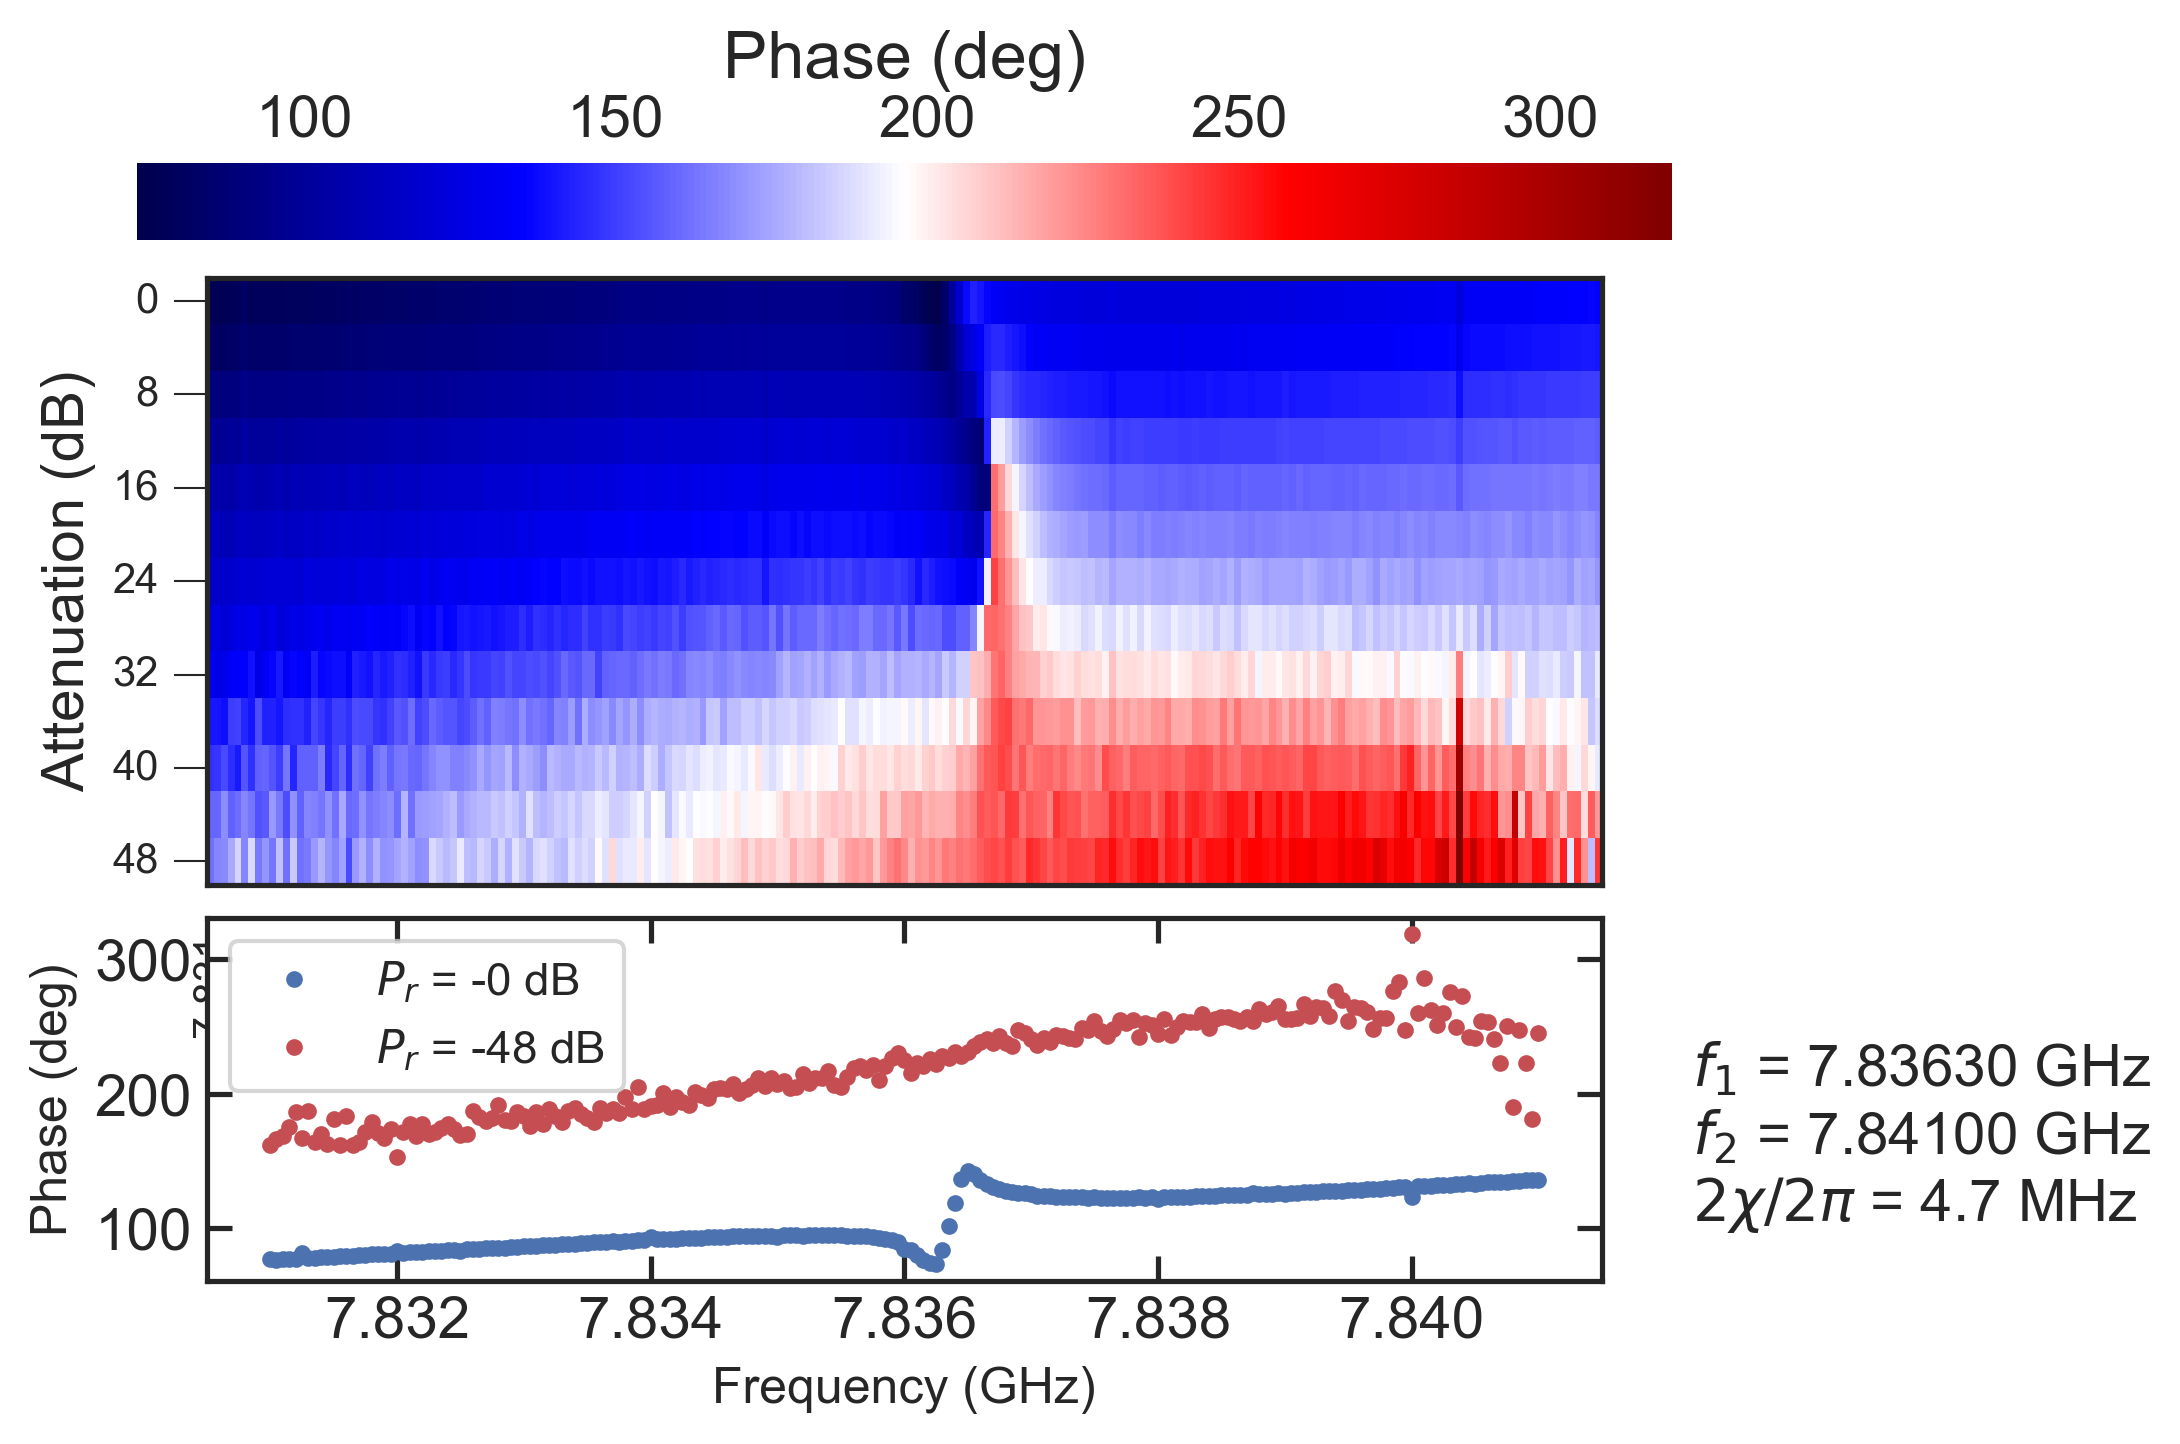

In [16]:
pf.punchout_plot(data,xlabel='Frequency (GHz)',ylabel='Attenuation (dB)',cbar_label='Phase (deg)')

In [63]:
qb.update_value('readout_atten',25)

Updating readout_atten to 25
Setting DA attenuation to 25.


# Qubit Spectroscopy

The first time we run qubit spectroscopy we have to use a high qubit driving amplitude for a couple of reasons. 
1. Detect higher levels like $\omega_{02}/2$ and $\omega_{03}/3$ so you can calculate anharmonicity.
2. Since you don't know exactly what the qubit frequency is going to be (unless you've nailed the fab process), you will have to execute a broad sweep. Driving the qubit at high power broadens the resonance (decreases coherence), makes it easier to detect $\omega_{01}$ -> frequency spacing can be larger.

## Narrow search

In [59]:
qb.pars['qubit_IF']

50000000.0

Updating qubit_LO to 2500000000.0
Setting qubit_LO frequency to 2500000000.0.
Setting sa frequency to 2500000000.0.
Setting sa span to 1000000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 1000.0.


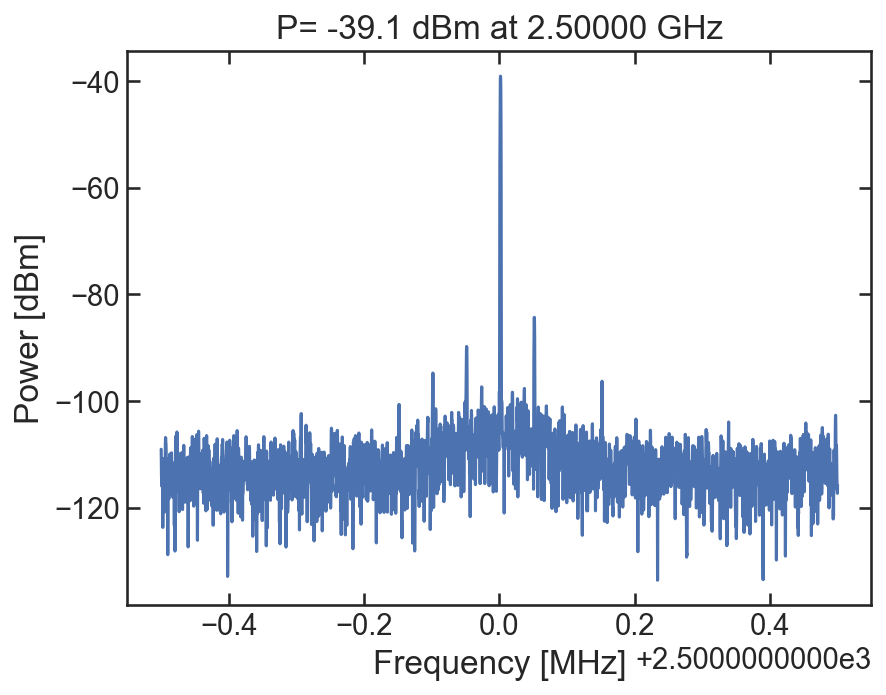

-39.05670928955078 dBm at 2.5000015128676467 GHz


-39.05671

In [27]:
qb.update_value('qubit_LO',2.5e9)
qb.get_power(fc=qb.pars['qubit_LO'],threshold=-20,sa_span=1e6,config=True,plot=True)   

In [ ]:
qb.update_value('readout_length', 5000)   
amp_q_scaling = 1
qb.update_value('n_avg',2000)

qb.pars['resettime']['qubit'] = int(100e3)
qb.write_pars()
qb.experiment = 'qubit_spec'
data, job = qb.qubit_spec(element='qubit',
                                check_mixers=True,
                                IF_min=50e6,
                                IF_max=e6,
                                f_LO=6.6e9,
                                df=0.5e6,
                                on_off=True,
                                amp_q_scaling = amp_q_scaling,
                                saturation_dur = 20e3,
                                showprogress=True,
                                savedata=False)

In [ ]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,find_peaks=True, amp_q_scaling=amp_q_scaling)

## Run broad spectroscopy scan on qubit

In [64]:
qb._instruments.set('sa','frequency',6e9)
qb.pars['resettime']['qubit'] = int(200e3)
qb.write_pars()
qb.pars

Setting sa frequency to 6000000000.0.


{'elements': ['qubit', 'rr'],
 'qubit_LO': 2500000000.0,
 'rr_LO': 7600000000.0,
 'readout_atten': 25,
 'host': None,
 'port': '9510',
 'Iout': {'qubit': 3, 'rr': 1},
 'Qout': {'qubit': 4, 'rr': 2},
 'Iin': 1,
 'Qin': 2,
 'AWG_trigger_out': 1,
 'controller': 'con1',
 'n_avg': 2500,
 'rr_IF': 236600000.0,
 'qubit_IF': 50000000.0,
 'gauss_len': 48,
 'gauss_amp': 0.45,
 'amp_r': 0.375,
 'readout_pulse_len_in_clk': 500,
 'saturation_duration': 2500,
 'readout_length': 5000,
 'qubit_freq': 4512900000,
 'rr_freq': 7836600000.0,
 'analog_input_offsets': [-0.09490396010454964, -0.06565227002910538],
 'analog_input_gain': 3,
 'rr_mixer_offsets': [-0.00505, 0.0019500000000000003],
 'qubit_mixer_offsets': [-0.00505, -0.00505],
 'rr_mixer_imbalance': [0.0, -0.4444444444444444],
 'qubit_mixer_imbalance': [0.011111111111111113, -0.1388888888888889],
 'tof': 292,
 'smearing': 10,
 'IQ_rotation': 0.0,
 'switch_weights': False,
 'resettime': {'qubit': 200000, 'rr': 5000},
 'kappa': 200000.0,
 'readout_

In [54]:
%matplotlib inline

Updating n_avg to 2500


  0%|          | 0/3 [00:00<?, ?it/s]

Updating qubit_LO to 2500000000.0
Setting qubit_LO frequency to 2500000000.0.
Setting sa frequency to 2500000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -30.
Setting sa bandwidth to 1000.0.
LO at 2.5 GHz
Current I_offset = -5.0 mV, Current Q_offset = -5.0 mV
Setting sa frequency to 2500000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -19.917739868164062.
Setting sa bandwidth to 1000.0.


100%|██████████| 121/121 [00:13<00:00,  9.06it/s]


Updating qubit_mixer_offsets to [-0.0091, -0.0101]
optimal I_offset = -9.1 mV, optimal Q_offset = -10.1 mV
Power: -63.50223159790039 dBm at 2.5 GHz


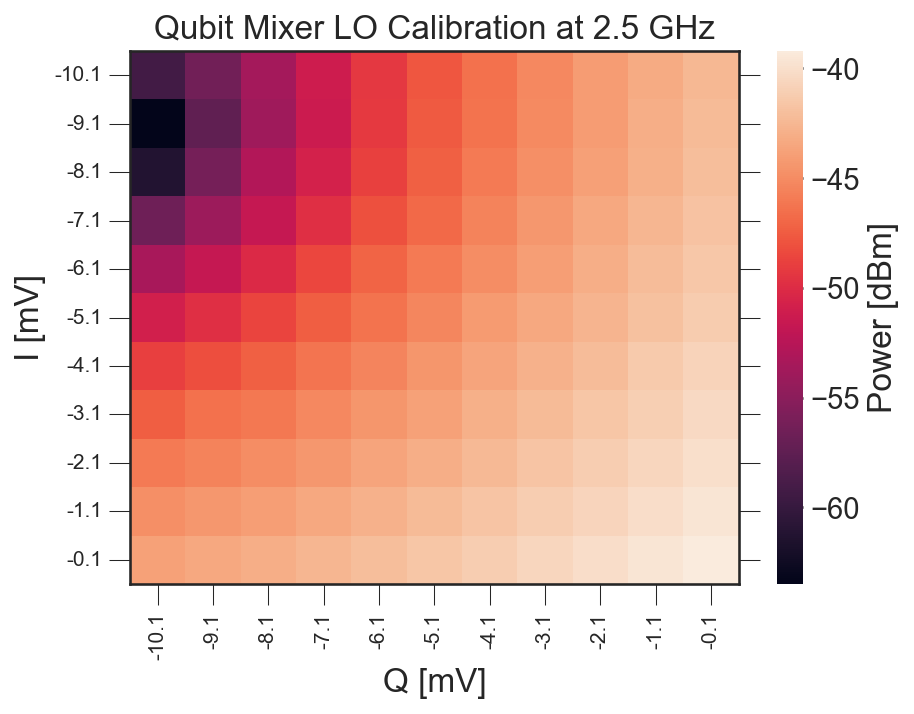

2024-04-25 16:51:46,221 - qm - INFO     - Performing health check
2024-04-25 16:51:46,233 - qm - INFO     - Health check passed
2024-04-25 16:51:46,583 - qm - INFO     - Sending program to QOP for compilation
2024-04-25 16:51:46,800 - qm - INFO     - Executing program


  0%|          | 0/2500 [00:00<?, ?it/s]

2024-04-25 16:51:46,873 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:46,982 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:46,988 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,002 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,007 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,021 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,026 - qm - ERROR    - Runtime errors were de

  0%|          | 1/2500 [00:00<14:19,  2.91it/s]

2024-04-25 16:51:47,227 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,240 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,255 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,261 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,277 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,282 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,297 - qm - ERROR    - Runtime errors were de

  0%|          | 2/2500 [00:00<13:16,  3.14it/s]

2024-04-25 16:51:47,518 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,524 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,539 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,548 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,561 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,567 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,582 - qm - ERROR    - Runtime errors were de

  0%|          | 3/2500 [00:00<13:56,  2.99it/s]

2024-04-25 16:51:47,872 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,878 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,892 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,899 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,914 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,919 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:47,933 - qm - ERROR    - Runtime errors were de

  0%|          | 4/2500 [00:01<13:25,  3.10it/s]

2024-04-25 16:51:48,175 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,181 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,198 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,204 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,242 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,253 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,284 - qm - ERROR    - Runtime errors were de

  0%|          | 5/2500 [00:01<13:25,  3.10it/s]

2024-04-25 16:51:48,500 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,506 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,521 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,533 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,548 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,553 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,581 - qm - ERROR    - Runtime errors were de

  0%|          | 6/2500 [00:01<12:57,  3.21it/s]

2024-04-25 16:51:48,789 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,795 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,812 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,818 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,834 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,840 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:48,858 - qm - ERROR    - Runtime errors were de

  0%|          | 7/2500 [00:02<13:48,  3.01it/s]

2024-04-25 16:51:49,179 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,187 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,217 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,232 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,256 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,272 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,288 - qm - ERROR    - Runtime errors were de

  0%|          | 8/2500 [00:02<12:26,  3.34it/s]

2024-04-25 16:51:49,393 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,398 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,415 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,422 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,436 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,441 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,459 - qm - ERROR    - Runtime errors were de

  0%|          | 9/2500 [00:02<12:45,  3.25it/s]

2024-04-25 16:51:49,725 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,736 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,756 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,763 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,785 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,796 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:49,813 - qm - ERROR    - Runtime errors were de

  0%|          | 10/2500 [00:03<13:29,  3.08it/s]

2024-04-25 16:51:50,086 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,094 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,116 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,125 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,146 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,153 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,174 - qm - ERROR    - Runtime errors were de

  0%|          | 11/2500 [00:03<12:59,  3.20it/s]

2024-04-25 16:51:50,371 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,379 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,396 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,404 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,419 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,425 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,444 - qm - ERROR    - Runtime errors were de

  0%|          | 12/2500 [00:03<13:07,  3.16it/s]

2024-04-25 16:51:50,694 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,708 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,750 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,758 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,784 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,798 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:50,821 - qm - ERROR    - Runtime errors were de

  1%|          | 13/2500 [00:04<13:34,  3.05it/s]

2024-04-25 16:51:51,045 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,051 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,069 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,075 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,100 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,106 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,120 - qm - ERROR    - Runtime errors were de

  1%|          | 14/2500 [00:04<13:19,  3.11it/s]

2024-04-25 16:51:51,360 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,367 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,386 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,393 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,421 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,428 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,452 - qm - ERROR    - Runtime errors were de

  1%|          | 15/2500 [00:04<13:03,  3.17it/s]

2024-04-25 16:51:51,654 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,659 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,685 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,692 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,708 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,714 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,729 - qm - ERROR    - Runtime errors were de

  1%|          | 16/2500 [00:05<12:56,  3.20it/s]

2024-04-25 16:51:51,960 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:51,967 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,000 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,014 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,059 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,074 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,114 - qm - ERROR    - Runtime errors were de

  1%|          | 17/2500 [00:05<13:32,  3.05it/s]

2024-04-25 16:51:52,323 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,332 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,357 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,362 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,378 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,384 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,400 - qm - ERROR    - Runtime errors were de

  1%|          | 18/2500 [00:05<13:04,  3.16it/s]

2024-04-25 16:51:52,615 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,624 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,647 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,655 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,676 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,686 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,708 - qm - ERROR    - Runtime errors were de

  1%|          | 19/2500 [00:06<12:53,  3.21it/s]

2024-04-25 16:51:52,913 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,918 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,933 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,939 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,954 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,960 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:52,973 - qm - ERROR    - Runtime errors were de

  1%|          | 20/2500 [00:06<12:53,  3.21it/s]

2024-04-25 16:51:53,225 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,232 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,259 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,266 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,283 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,289 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,303 - qm - ERROR    - Runtime errors were de

  1%|          | 21/2500 [00:06<12:44,  3.24it/s]

2024-04-25 16:51:53,524 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,530 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,545 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,552 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,566 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,572 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,587 - qm - ERROR    - Runtime errors were de

  1%|          | 22/2500 [00:07<13:22,  3.09it/s]

2024-04-25 16:51:53,884 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,889 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,904 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,910 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,925 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,931 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2024-04-25 16:51:53,944 - qm - ERROR    - Runtime errors were de

  0%|          | 0/3 [00:22<?, ?it/s]


KeyboardInterrupt: 

In [66]:
qb.update_value('n_avg',2500)
qb.experiment = 'qubit_spec'
df_qubit_spec = 1e6
data, job = qb.run_scan(df = df_qubit_spec, element='qubit',
                                check_mixers=True,
                                chunksize = 350e6,
                                lo_min = 2.5e9,
                                lo_max = 3.5e9,
                                amp_q_scaling = 0.8,
                                on_off=True,
                                saturation_dur = 20e3,                   
                                showprogress=True,
                                savedata=True)

In [44]:
%matplotlib qt
pf.qubit_spec_plot(data,qb_pars=qb.pars,df=df_qubit_spec,rrFreq=qb.pars['rr_freq'],amp_q_scaling=1)

Peak threshold at 0.03242865859927242
Peaks at: 3.554 GHz

